<a href="https://colab.research.google.com/github/alemnew97de/Census-income-DATA-EDA/blob/main/linear_regression_practical_example_with_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning algorithm

#instance based(for each particular data and check current surrounding for each data type,memorize the data,no training need to help to generalize vs
#model based learning(~generilize form to learn the data since understood the pattern---decision boundary by learninng the pattern of the data

**equation of line,3rd plane and hyperplane(n dimesion)**

straight line
y=mx+c, ax+by+c=0
w1x1+w2x2+b=0,
wtranspose(t)x+b=0
equation of st line passing the origin---wtransposTx=0

n dimesion plane
w1x1+.......wnxn +b=0


**simple linear regression**

> supervised ML
single input feature
creat best fite line, predict the output
distance b/n true and predicted points should be minimal,summation of all points.
dataset---create best fite line by providing the equation y=mx+c

**Error
error=y-y(hat)-----y(hat)=predicted point,y=true point.

optimization way to get best str line

**cost function**
= true optimized poin==mean square error
**Aim**
minimize cost function to be minimal as possible by changing intercept and slope.

**global minima**
my error minimized and the point called gradient descent curve by changing slp and intercept~~~~~~~~~~cost function is zero or minimal. and this is a point where best straigt line created

convergence algorthim

optimize the changes of slope and repeat till convergence till we get converegence..

learning rate used which controlls at which rate


 the converegece happened.
Conclussion:

gradient descent


convergence





# MSE, MAE,RMSE------COST FUNCTION---TO MEASURE PERFORMANCE METRICS

**MSE**

~Global minima-----error minimal
real projected point
predicted data point
MSE=summation(yi-yihat)sequred/n~ cost function
Advantages
1, differeciable at all point due to the curve
2.it has 1 local and 1 global minima
3. Converges faster

disadvantage
1. the equation not robust to outliers.
penalizing the outliers~~~~ increase the error since the formula is squared--MSE incressing.
2.it is no longer in the same unite that makes difficult to compare with the original.

**MAE**
(/y-yhat/)/n~~~~~~

advantage
1. robust to outliers
2. it will be in the same unite, comparing the data easy.
disadvantage
1.not deferenciable.
2.convergence usually take more time,optimization is a complex process.
3. it is time consuming

RMSE--root mean squred error
=(y-yhat)squ/n
adva
same unit
differeciable
disadvatage
not robust to outliers

# performance metrics used in linear regrssion

**R squared

to get best st line
=1- (Sum of square resid)/sum 0f square total
=1-small/big number
~1-----.9=90% accuracy.

**Adjusted R squared

size of house increase~price increase----tve correlation
many independet feature and one feature with no correlation~~~R sequared might increase slightly.this is the problem for R.to prevent this use adjusted R2
Adjusted R2= 1-[(1-r2)(N-1)]/N-p-1----p=no of independet features and N=no of data points.
~p=3, r2=92%,R2 adjusted=82%

# linear regression using OLS(ordinaryleast square)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_excel('weight and height.xlsx')

In [10]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

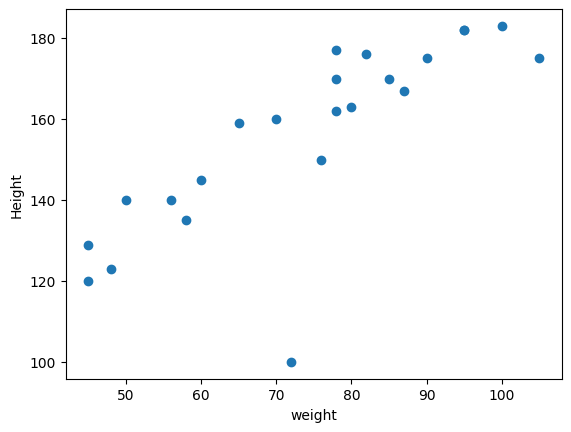

In [14]:
###scatter plot~~~~ relation ship
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('Height')

In [16]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.802449
Height,0.802449,1.000000


In [17]:
# seaborn for visualization
import seaborn as sns

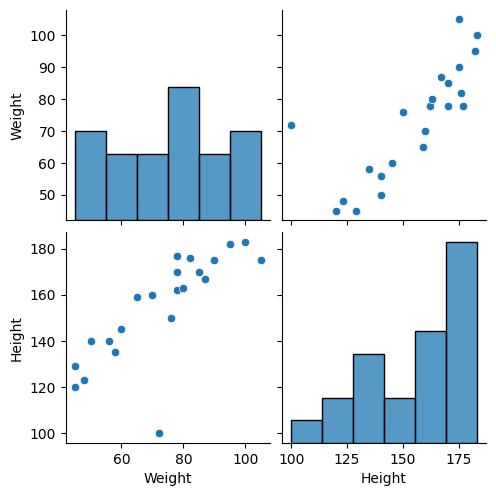

In [19]:
sns.pairplot(df)

In [24]:
#independent and dependent feaure
X=df['Weight']
print(X)
print(type(X))
print(type(df))

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [35]:
X=df[['Weight']] #independent feature should be data frame or 2 dimesional
print(type(X))
print(np.array(X))

<class 'pandas.core.frame.DataFrame'>
[[ 45]
 [ 58]
 [ 48]
 [ 60]
 [ 70]
 [ 78]
 [ 80]
 [ 90]
 [ 95]
 [ 78]
 [ 82]
 [ 95]
 [105]
 [100]
 [ 85]
 [ 78]
 [ 50]
 [ 65]
 [ 76]
 [ 87]
 [ 45]
 [ 56]
 [ 72]]


In [48]:
X=df[['Weight']]
print(np.array(X).shape)
print(X.head())
y=df['Height'] # this variable can be in series or 1 d array.example below.
print(y)

(23, 1)
   Weight
0      45
1      58
2      48
3      60
4      70
0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    100
Name: Height, dtype: int64


In [42]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [49]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    100
Name: Height, dtype: int64

In [50]:
np.array(y).shape

(23,)

In [54]:
#train test split----over fitting and under fitting condition --train only for training and test for testing and prediction purpose.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [55]:
X_train.shape

(17, 1)

In [56]:
#Standardization~~~~~global minima,optimization takes time.apply z score to all data points std=1 and mean=0
from sklearn.preprocessing import StandardScaler


In [59]:
scaler=StandardScaler()   #not on the output feature but training data, the test data does not need fit_transform due to data leakage from training data to test data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [60]:
X_test=scaler.transform(X_test)
X_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 78.],
       [ 78.],
       [ 45.],
       [ 95.],
       [ 65.],
       [105.]])

In [65]:
#apply Linear R
from sklearn.linear_model import LinearRegression

In [71]:
regression=LinearRegression(n_jobs=-1) #initialize first LR.


In [73]:
  # it should be 2D array as indicated and discussed above.

In [72]:
#Therefore

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [77]:
print('slop:', regression.coef_)

slop: [17.39882298]


In [75]:
regression.intercept_

152.94117647058823

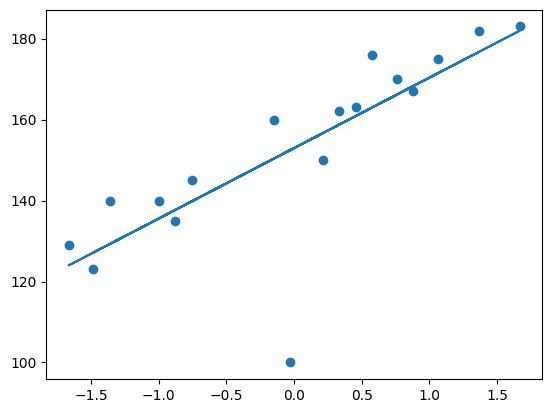

In [82]:
#plot best ST line
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train))

In [85]:
#prediction for test data
y_predict=regression.predict(X_test)
y_predict

array([1510.04936883, 1510.04936883,  935.88821053, 1805.82935948,
       1283.86467011, 1979.81758927])

In [90]:
#performance
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1899655.8913342373
1340.4164278400629
1378.280048224684


In [94]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score

-4364.631157869935

In [95]:
#display adjusted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-5456.038947337419

In [98]:
from scipy.stats import fit
#ols Li R
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [101]:
prediction=model.predict(X_test)
prediction

array([1357.10819236, 1357.10819236,  782.94703406, 1652.88818301,
       1130.92349364, 1826.8764128 ])

In [103]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2053
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                       0.657
Time:                        02:02:51   Log-Likelihood:                         -109.70
No. Observations:                  17   AIC:                                      221.4
Df Residuals:                      16   BIC:                                      222.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [118]:
#prediction for new data
regression.predict([[72]])  #not right outcome

array([1405.65643096])

In [115]:
regression.predict(scaler.transform([[72]]))  ??????still the same, but we should use as such.

array([1405.65643096])